# T-distributed Stochastic Neighbor Embedding

Because this is relatively high dimensional data and it can't simply be plottted and visualised, we wanted to employ TSNE as a technique to allow us to visualise the data

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(user_embeddings)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1892 samples in 0.008s...
[t-SNE] Computed neighbors for 1892 samples in 0.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1892
[t-SNE] Computed conditional probabilities for sample 1892 / 1892
[t-SNE] Mean sigma: 1.007300
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.461784
[t-SNE] KL divergence after 300 iterations: 0.708648
t-SNE done! Time elapsed: 4.541324138641357 seconds


We first took a look at what the Users would be like after the TSNE process. 

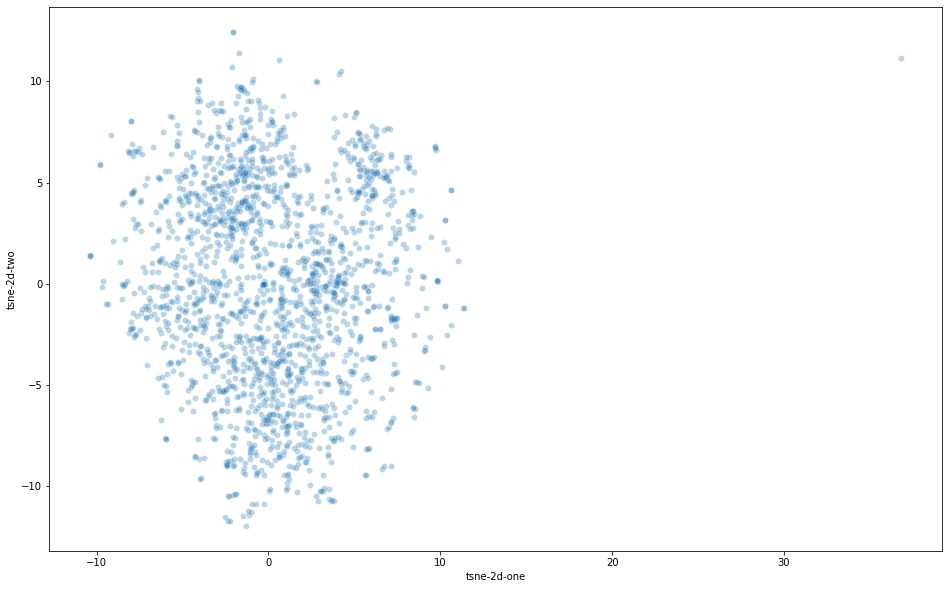

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=user_embeddings,
    legend="full",
    alpha=0.3
)

Nothing really jumped out at us here, so we decided to take a look at the Artists after TSNE instead

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(artist_embeddings)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 17632 samples in 0.087s...
[t-SNE] Computed neighbors for 17632 samples in 32.836s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17632
[t-SNE] Computed conditional probabilities for sample 2000 / 17632
[t-SNE] Computed conditional probabilities for sample 3000 / 17632
[t-SNE] Computed conditional probabilities for sample 4000 / 17632
[t-SNE] Computed conditional probabilities for sample 5000 / 17632
[t-SNE] Computed conditional probabilities for sample 6000 / 17632
[t-SNE] Computed conditional probabilities for sample 7000 / 17632
[t-SNE] Computed conditional probabilities for sample 8000 / 17632
[t-SNE] Computed conditional probabilities for sample 9000 / 17632
[t-SNE] Computed conditional probabilities for sample 10000 / 17632
[t-SNE] Computed conditional probabilities for sample 11000 / 17632
[t-SNE] Computed conditional probabilities for sample 12000 / 17632
[t-SNE] Computed conditional probabilities for s

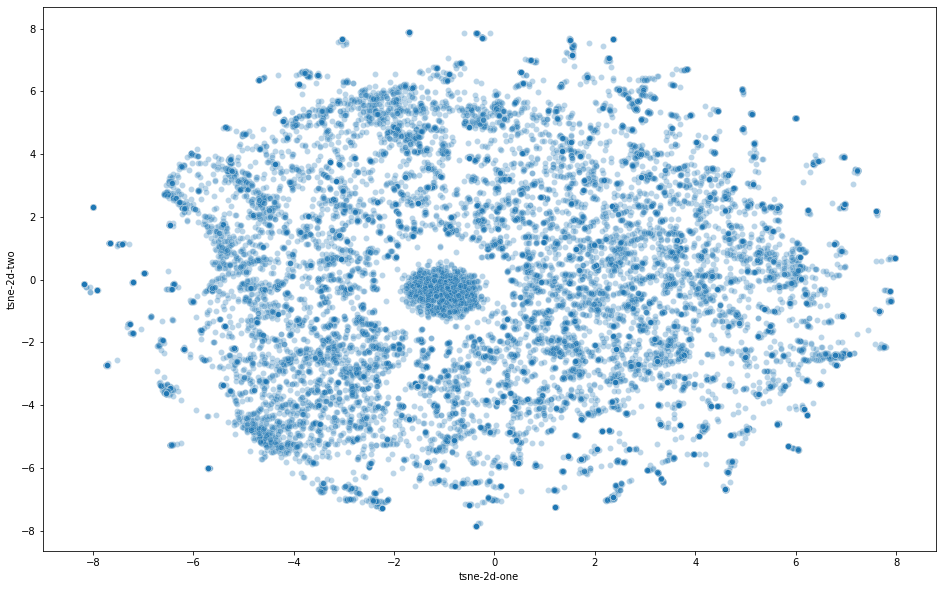

In [ ]:
artist_embeddings['tsne-2d-one'] = tsne_results[:,0]
artist_embeddings['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=artist_embeddings,
    legend="full",
    alpha=0.3
)

We found this visual quite fascinating, it seemed there was something very unique about the central cluster of artists, with the clear gap around it. We decided to try to investigate what it was that is grouping these artists in such a strange way

In [ ]:
artist_embeddings['Artist ID'] = str
for i in range(0,len(artist_embeddings)):
  artist_embeddings['Artist ID'][i] = str(i+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


These next 4 cells essenitally perform a zoom in to that central cluster

In [ ]:
rslt_df = artist_embeddings.loc[artist_embeddings['tsne-2d-one'] > -2 ] 

In [ ]:
rslt_df = rslt_df.loc[rslt_df['tsne-2d-one'] < 0] 

In [ ]:
rslt_df = rslt_df.loc[rslt_df['tsne-2d-two'] < 1.8 ] 

In [ ]:
rslt_df = rslt_df.loc[rslt_df['tsne-2d-two'] > -2 ] 

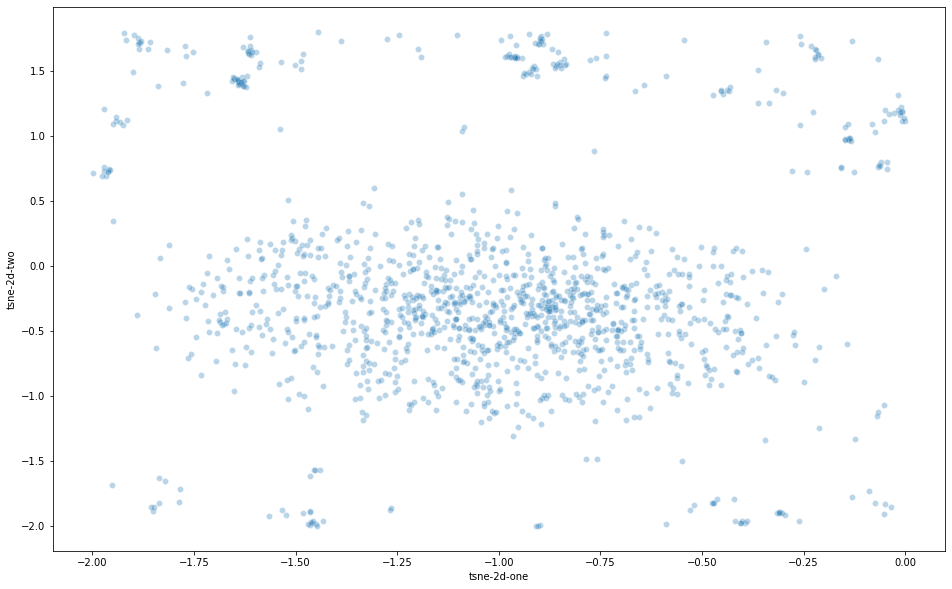

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=rslt_df,
    legend="full",
    alpha=0.3
)

We can see we have mostly isolated these artists that we are interested in, but we can do better. The next two cells cut out more of the surrounding artists that we don't want

In [ ]:
rslt_df = rslt_df.loc[rslt_df['tsne-2d-two'] < 0.6 ] 

In [ ]:
rslt_df = rslt_df.loc[rslt_df['tsne-2d-two'] > -1.5 ] 

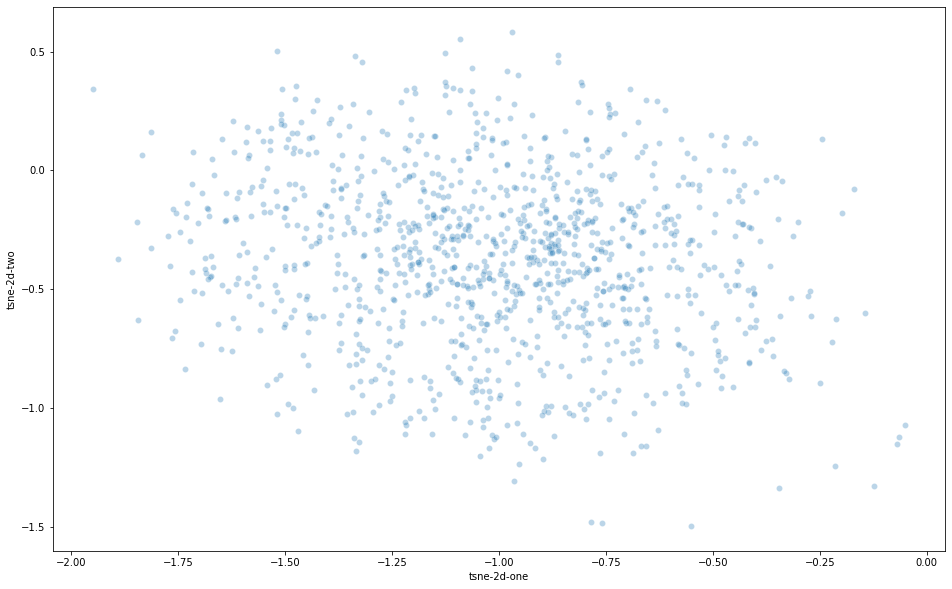

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=rslt_df,
    legend="full",
    alpha=0.3
)

Bingo. Now we really only have the artists that were in this strange cluster

In [ ]:
artist_id_set = set(rslt_df["Artist ID"])

We decided to take a look at them and see if anthing stands out, but unfortunately we don't have any great hypothesis as to what it is that's seperating them. We also had some time constraints at this point so couldn't do much more work down this avenue, but we might return to this in our own time. We did see some anecdotal reporting about limitations with TSNE and how it can sometimes create patterns that don't really exist in the dataset. That's one hypothesis we have as to what has happened here.

In [ ]:
for i in range(0, len(artists)):
  if str(artists.id.iloc[i]) in artist_id_set:
    print(artists.name.iloc[i])

Moby
Dustin O'Halloran
VAST
Keyshia Cole
Bob Marley
Whitney Houston
Avril Lavigne
Silbermond
Pitchshifter
The Kinks
Aretha Franklin
Nikolas Metaxas
RBD
Hadise
Dima Bilan
Evridiki
Eric Saade
Duncan Sheik & Steven Sater
16 Horsepower
Dragonette
Dr. Sin
Nicky Wire
Shadow Project
Shpongle
Bolt Thrower
Velvet Acid Christ
Culture Kultür
Jag Panzer
Based On Abba
Antonio Vivaldi
Hatebreed
Carnifex
Brain Drill
Paris Hilton
Jeru the Damaja
The D.O.C.
Outono em Marte
Tequila Baby
Blind Melon
Chicas
А-Студио
SMS
Thomas Dolby
Stemage
Jorn
Sarah Brightman
소녀시대
U-KISS
Beach House
Lisa Marie Presley
Tera Melos
Sezen Aksu
Mikis Theodorakis
Barış Manço
Zerrin Özer
Erkin Koray
Bleed From Within
The Lovely Feathers
Mitch Hedberg
Billie Holiday & Teddy Wilson & His Orchestra
vanessa carllton
Kajagoogoo
Before Their Eyes
Kettel
Xanopticon
Last Step
Swampyboy
AleX Tune
Uoki-Toki
Hate
Akercocke
dredg
Sweet
Maxïmo Park
Free
Jim Sturgess & Joe Anderson
Buddy Guy
Large Professor
Dokken
Chamillionaire
Dead by Sun